In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from IPython.display import Image
import graphviz
from sklearn.tree import export_graphviz, DecisionTreeClassifier

In [2]:
nfl2022 = pd.read_csv('/Users/wendychiang/Desktop/2022NFL.csv')

In [3]:
nfl2022.head()

,Team1,Team1_Off_rank,Team1_Def_rank,Location,Team2,Team2_Off_rank,Team2_Def_rank,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers,Result
0,Atlanta Falcons,15,23,HOME,Arizona Cardinals,21,31,166,132,1,213,126,0,1
1,Carolina Panthers,20,19,HOME,Arizona Cardinals,21,31,180,40,3,206,132,1,0
2,Denver Broncos,32,14,HOME,Arizona Cardinals,21,31,156,168,2,167,73,3,1
3,Kansas City Chiefs,1,16,A1AY,Arizona Cardinals,21,31,360,128,1,179,103,0,1
4,Las Vegas Raiders,12,26,HOME,Arizona Cardinals,21,31,244,80,1,270,143,1,0


In [4]:
nfl2022.isnull().sum()

Team1              0
Team1_Off_rank     0
Team1_Def_rank     0
Location           0
Team2              0
Team2_Off_rank     0
Team2_Def_rank     0
Team1_Passing      0
Team1_Rushing      0
Team1_Turnovers    0
Team2_Passing      0
Team2_Rushing      0
Team2_Turnovers    0
Result             0
dtype: int64

In [5]:
x = nfl2022.drop('Result', axis=1)
y = nfl2022['Result']

In [6]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=.2,random_state=500)

In [7]:
print(train_x.shape)
print(test_x.shape)

(452, 13)
(114, 13)


In [8]:
print('Baseline accuracy is: {}'.format(train_y.value_counts(normalize=True).max()))

Baseline accuracy is: 0.504424778761062


In [9]:
model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=55)
)

model.fit(train_x,train_y)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Team1', 'Location', 'Team2'],
                                mapping=[{'col': 'Team1',
                                          'data_type': dtype('O'),
                                          'mapping': Minnesota Vikings         1
Detroit Lions             2
Los Angeles Rams          3
Houston Texans            4
Dallas Co1boys            5
Ne1 England Patriots      6
Indianapolis Colts        7
San Francisco 49ers       8
Tennessee Titans          9
Tampa Bay Buccaneers     10
Miami Dolphins           11
Cincinnati Bengals       12
Ne1 Orleans Sa...
Indianapolis Colts       21
Los Angeles Rams         22
Minnesota Vikings        23
Cleveland Bro1ns         24
Ne1 England Patriots     25
Philadelphia Eagles      26
Tampa Bay Buccaneers     27
Ne1 Orleans Saints       28
Houston Texans           29
Jacksonville Jaguars     30
Detroit Lions            31
Baltimore Ravens         32
NaN                      -2


In [10]:
features = ['Team1','Team1_Off_rank','Team1_Def_rank','Location','Team2','Team2_Off_rank',
            'Team2_Def_rank','Team1_Passing','Team1_Rushing',
            'Team1_Turnovers','Team2_Passing','Team2_Rushing','Team2_Turnovers']

In [11]:
accu = accuracy_score(model.predict(test_x),test_y)

print('Forest Model Accuracy: {}'.format(accu))

Forest Model Accuracy: 0.7719298245614035


In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [14]:
y_pred = model.predict(test_x)

In [15]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        57
           1       0.77      0.77      0.77        57

    accuracy                           0.77       114
   macro avg       0.77      0.77      0.77       114
weighted avg       0.77      0.77      0.77       114



In [16]:
print(confusion_matrix(test_y, y_pred))

[[44 13]
 [13 44]]


In [13]:
def features_importance(importances, feature_names):
    indices = np.argsort(importances)[::-1]
    max_feature_name_length = max([len(feature) for feature in feature_names])

    print('      Feature{space: <{padding}}      Importance'.format(padding=max_feature_name_length - 8, space=' '))
    
    for train_x_i in range(len(importances)):
        print('{number:>2}. {feature: <{padding}} ({importance})'.format(
            number=train_x_i + 1,
            padding=max_feature_name_length,
            feature=feature_names[indices[train_x_i]],
            importance=importances[indices[train_x_i]]))
        

imp = model.named_steps['randomforestclassifier'].feature_importances_
features_importance(imp,features)

      Feature             Importance
 1. Team1_Rushing   (0.12260896056185949)
 2. Team2_Rushing   (0.11169031624531055)
 3. Team2_Off_rank  (0.09577227953750544)
 4. Team2_Passing   (0.09258372515580407)
 5. Team1_Off_rank  (0.09243136548399324)
 6. Team2_Turnovers (0.08924193085929165)
 7. Team1_Passing   (0.08734571289192365)
 8. Team1_Turnovers (0.07371080289848302)
 9. Team2_Def_rank  (0.0625719941276675)
10. Team1_Def_rank  (0.059837889392098415)
11. Team1           (0.05232145999474829)
12. Team2           (0.04438118511980014)
13. Location        (0.015502377731514725)


In [18]:
# Super Bowl Lineup -- Using regular season data
lineup = [['Kansas City Chiefs',1,16,'AWAY','Philadelphia Eagles',2,8,294.47,113.47,1.26,230.21,153.95,1]]
sb = pd.DataFrame(lineup, columns=features)
sb

,Team1,Team1_Off_rank,Team1_Def_rank,Location,Team2,Team2_Off_rank,Team2_Def_rank,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers
0,Kansas City Chiefs,1,16,AWAY,Philadelphia Eagles,2,8,294.47,113.47,1.26,230.21,153.95,1


In [19]:
# Predict the matching result
model.predict_proba(sb)

array([[0.69, 0.31]])

****According to the Random Forest Model(Regular Season Data)**** <br>
。Kansas City Chief will have a 69% win the superbowl <br>
。Philadelphia Eagles will have a 31% win the superbowl

In [20]:
lineup2 = [['Kansas City Chiefs',1,16,'AWAY','Philadelphia Eagles',2,8,290.15,118.23,1,232.44,121.33,1.11]]
sb2 = pd.DataFrame(lineup2, columns=features)
sb2

,Team1,Team1_Off_rank,Team1_Def_rank,Location,Team2,Team2_Off_rank,Team2_Def_rank,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers
0,Kansas City Chiefs,1,16,AWAY,Philadelphia Eagles,2,8,290.15,118.23,1,232.44,121.33,1.11


In [21]:
# Predict the matching result
model.predict_proba(sb2)

array([[0.56, 0.44]])

****According to the Random Forest Model(Playoff Data Only)**** <br>
。Kansas City Chief will have a 56% win the superbowl <br>
。Philadelphia Eagles will have a 44% win the superbowl

# Decision Tree Classifier

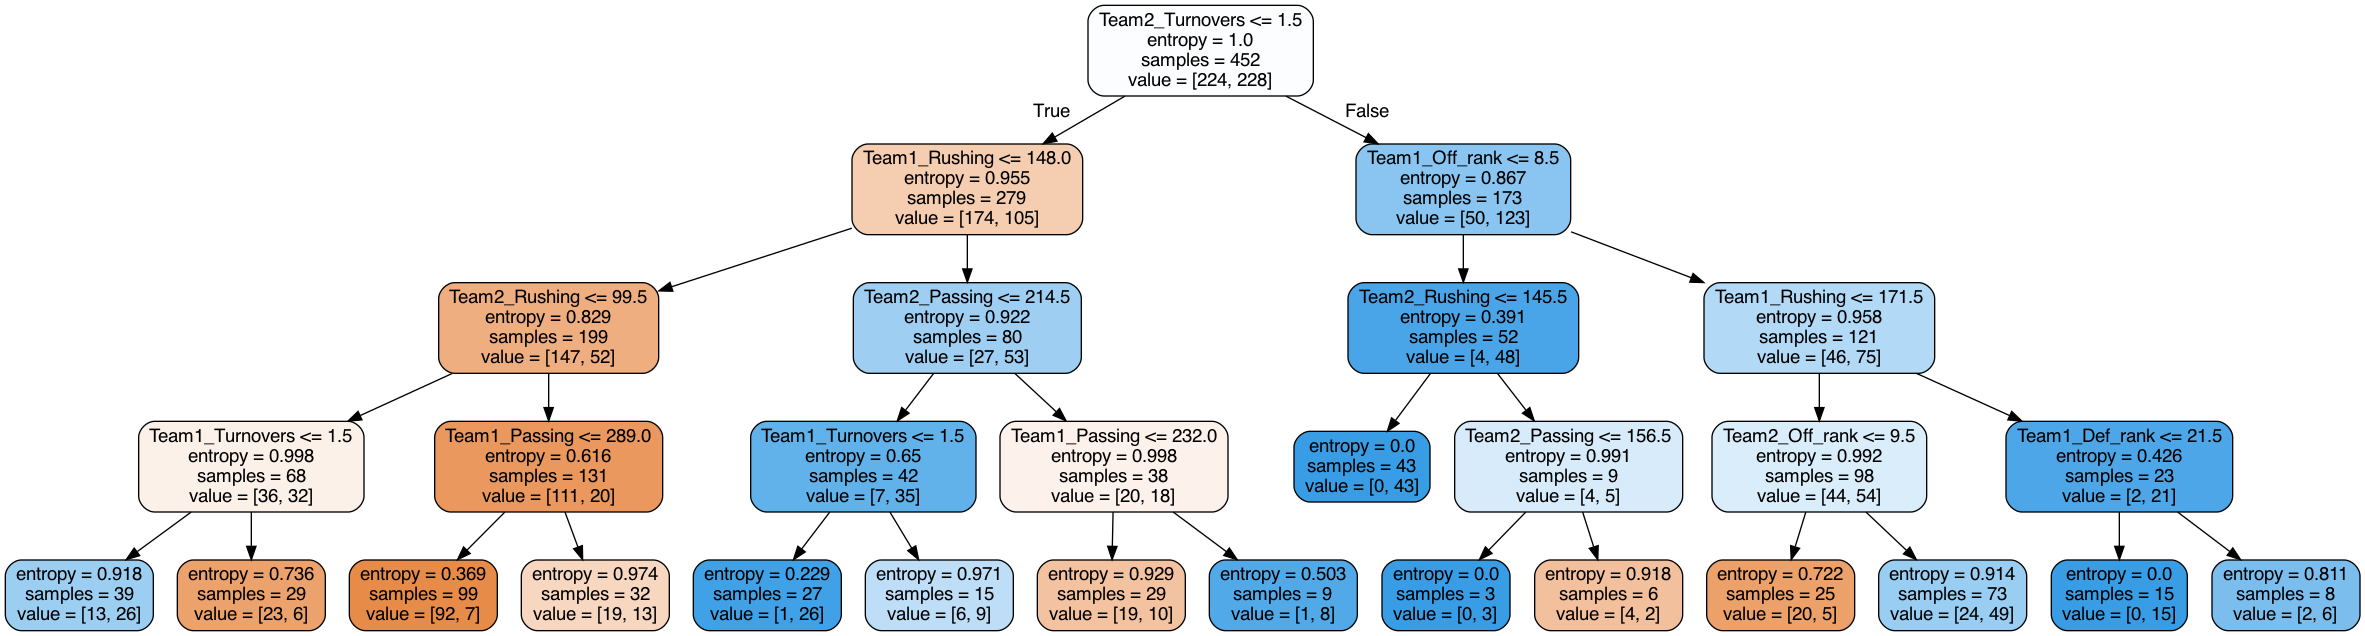

In [26]:
def plot_tree(clf, feature_names=None):
    dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_names,
    filled=True,
    rounded = True,
    rotate=False)
    
    return Image(graphviz.Source(dot_data).pipe(format='png'))

ordienco = OrdinalEncoder()
ordienco.fit(train_x)
xx_train = ordienco.transform(train_x)


clf = DecisionTreeClassifier(max_depth=4,criterion='entropy', random_state=20)
clf.fit(xx_train,train_y)

display(plot_tree(clf,feature_names=features))